# Regressões

Neste módulo realizaremos o estudo de regressões, um conceito importantíssimo para algoritmos de machine learning.

A análise por regressão é usada para prever o valor de uma variável com base no valor de outra. A variável que se deseja prever é chamada de variável dependente. A variável que é usada para prever o valor de outra variável é chamada de variável independente. 

A partir da relação encontrada entre a variável dependente e a independente, é possível prever o comportamento da variável dependente, dadas variações arbitrárias da variável independente.

Os algoritmos de regressão buscam a curva que melhor se encaixa aos dados, utilizando, principalmente, o critério dos mínimos quadrados.

Ao longo do capítulo detalharemos melhor alguns dos tipos de regressão mais comuns.

## Importando bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Carregando base de dados
Para auxiliar nosso estudo sobre regressões, utilizaremos uma base de dados sobre veículos, em que desejamos prever suas respectivas emissões de dióxido de carbono com base nas características do veículo, que serão detalhadas mais à frente.

In [2]:
Fuel = pd.read_csv("FuelConsumption.csv")
Fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Entendendo a base de dados

A base contém especificações de modelos de caminhões e seus valores de consumo de combustível, com estimativas de emissões de dióxido de carbono.

*   **MODELYEAR** (Ano de fabricação do modelo, exemplo: 2014)
*   **MAKE** (Fabricante, exemplo: Acura)
*   **MODEL** (Modelo, exemplo: ILX)
*   **VEHICLE CLASS** (Classe do veículo, exemplo: SUV)
*   **ENGINE SIZE** (Cilindrada, exemplo: 4.7)
*   **CYLINDERS** (Número de cilindros, exemplo: 6)
*   **TRANSMISSION** (Transmissão, exemplo: A6)
*   **FUEL CONSUMPTION in CITY(L/100 km)** (Consumo de combustível na cidade, exemplo: 9.9)
*   **FUEL CONSUMPTION in HWY (L/100 km)** (Consumo de combustível na estrada, exemplo: 8.9)
*   **FUEL CONSUMPTION COMB (L/100 km)** (Consumo de combustível combinado, exemplo:. 9.2)
*   **CO2 EMISSIONS (g/km)** (Emissões estimadas de CO2, exemplo: 182)



## Verificação de relações entre os dados
Essa etapa é importantíssima e irá nortear todo o processo de regressão. É com base nas relações feitas nessa parte que escolheremos os parâmetros dos modelos e saberemos o que esperar de resultado.

Para aplicar quaisquer algoritmos de machine learning, a realização de um bom estudo prévio da base de dados é essencial para que o restante do processo gere bons resultados.

In [3]:
Fuel.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


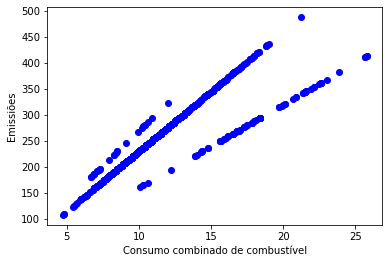

In [4]:
# Observando a relação entre consumo de combustível e emissões de CO2
plt.scatter(Fuel.FUELCONSUMPTION_COMB, Fuel.CO2EMISSIONS,  color='blue')
plt.xlabel("Consumo combinado de combustível")
plt.ylabel("Emissiões")
plt.show()

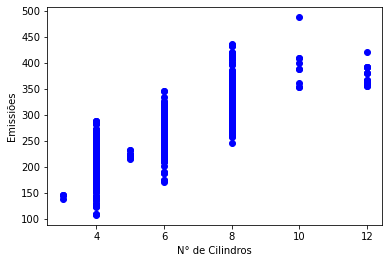

In [5]:
# Observando a relação entre a quantidade de cilindros e as emissões de CO2
plt.scatter(Fuel.CYLINDERS, Fuel.CO2EMISSIONS, color = 'blue')
plt.xlabel("N° de Cilindros")
plt.ylabel("Emissiões")
plt.show()

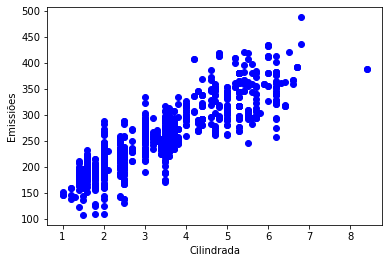

In [6]:
# Observando a relação entre cilindrada e emissões de CO2
plt.scatter(Fuel.ENGINESIZE, Fuel.CO2EMISSIONS,  color='blue')
plt.xlabel("Cilindrada")
plt.ylabel("Emissiões")
plt.show()

## 1. Regressão Linear Simples

A regressão linear simples serve para estabelecer uma relação linear entre as variáveis analisadas. Graficamente, essa relação pode ser vista como uma função afim, que tem equação característica da forma:
$$y = a + b\  x $$
Onde "a" é o coeficiente linear da reta e "b" é o coeficiente angular.
O que o modelo de regressão linear, dada pela biblioteca sklearn faz, é encontrar os coeficientes angular e linear automaticamente, considerando os dados que alimentam o modelo.

Uma vez que podem ser verificadas tendências lineares entre alguns dados analisados, então possivelmente obteremos uma boa aproximação para uma reta

### 1.1. Separando dados de treino e teste

Primeiramente, realizaremos uma divisão dos dados entre dados de treino e de teste. Isso é necessário para que não ocorra um fenômeno estatístico chamado overfitting, que é quando um modelo estatístico se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados. 

Nesse caso, separaremos 80% dos dados para servirem de treino ao modelo, e o restante, para servirem de teste.

In [7]:
# Separando dados aleatoriamente entre vetores de treino e teste
msk = np.random.rand(len(Fuel)) < 0.8
treino = Fuel[msk]
teste = Fuel[~msk]
X_treino = np.asanyarray(treino[['ENGINESIZE']])
y_treino = np.asanyarray(treino[['CO2EMISSIONS']])
X_teste = np.asanyarray(teste[['ENGINESIZE']])
y_teste = np.asanyarray(teste[['CO2EMISSIONS']])

### 1.2. Criando modelo de regressão

Em seguida, a biblioteca sklearn será utilizada para gerar o modelo de regressão automaticamente. 

É altamente recomendado que você seja capaz de entender a documentação da biblioteca sklearn para o caso de precisar criar modelos mais personalizados, ou mesmo utilizar modelos que não cobrimos aqui. Para incentivar isso, deixo o link sobre a função de modelo linear: 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [8]:
from sklearn import linear_model

# Utilizando a biblioteca para criar a melhor reta de regressão linear
regr = linear_model.LinearRegression()
regr.fit(X_treino, y_treino)

# Imprimindo os valores obtidos para os coeficientes angular e linear
print('Coeficiente angular: ', regr.coef_)
print('Coeficiente linear: ',regr.intercept_)

Coeficiente angular:  [[39.46211368]]
Coeficiente linear:  [124.30217412]


### 1.3. Exibindo resultados

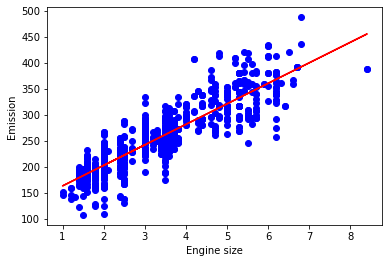

In [9]:
plt.scatter(X_treino, y_treino,  color='blue')
plt.plot(X_treino, regr.coef_[0][0]*X_treino + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### 1.4. Avaliando resultados

In [10]:
from sklearn.metrics import r2_score

y_predito = regr.predict(X_teste)

print("Erro médio absoluto: %.2f" % np.mean(np.absolute(y_predito - y_teste)))
print("Erro residual da soma dos quadrados (MSE): %.2f" % np.mean((y_predito - y_teste) ** 2))
print("R2-score: %.2f" % r2_score(y_teste, y_predito))

Erro médio absoluto: 26.09
Erro residual da soma dos quadrados (MSE): 1128.80
R2-score: 0.73


## 2. Regressão Polinomial

Em alguns casos, a relação entre as variáveis não é linear, mas ainda é possível observar uma relação contínua entre os dados. Nesse caso, podemos utilizar métodos de Regressão Polinomial.

Resgatando o conceito de polinômios, a relação entre a variável dependente y e a variável independente x pode ser dita polinomial quando expressa na forma: 
$$y = a + \theta_1  x + \theta_2 x^2 + ... + \theta_n x^n$$

Em que podemos variar o grau do polinômio n de acordo com o mais adequado para os dados em questão.


### 2.1. Tratamento prévio para transformação polinomial

A função **PolynomialFeatures()**, juntamente com a **fit_transform**, da biblioteca Scikit-learn gera uma matriz com n+1 colunas, em que cada coluna representa um grau do polinômio. Seus valores são todas as combinações polinomiais da variável x. Ou seja, a primeira coluna terá os valores de x^0, a segunda x^1, a terceira x^2 e assim por diante, até x^n. A partir dessa matriz, é possível utilizar o modelo de regressão linear para encontrar os coeficientes ideais para cada grau.

No caso a seguir, utilizaremos um polinômio de grau 2. Portanto, a função nos retornará uma matriz do tipo:

\begin{bmatrix}
\ 1 & x_1 & x_1^2\\
\ 1 & x_2 & x_2^2\\
\vdots & \vdots & \vdots\\
\ 1 & x_n & x_n^2
\end{bmatrix}

Exemplo: considere que nossos valores de x são [2.4, 1.5, 3.5], as funções os transformarão da seguinte forma: 
$$
\begin{bmatrix}
2.4\\
1.5\\
3.5\\
\end{bmatrix} \longrightarrow \begin{bmatrix}
\ 1 & 2.4 & 5.76\\
\ 1 & 1.5 & 2.25\\
\ 1 & 3.5 & 12.25\\
\end{bmatrix}
$$

In [11]:
from sklearn.preprocessing import PolynomialFeatures

treino_x = np.asanyarray(treino[['ENGINESIZE']])
treino_y = np.asanyarray(treino[['CO2EMISSIONS']])

teste_x = np.asanyarray(teste[['ENGINESIZE']])
teste_y = np.asanyarray(teste[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
treino_x_poly = poly.fit_transform(treino_x)
treino_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ]])

### 2.2. Criando modelo de regressão

Dados os valores de x com diferentes potências, o modelo de regressão linear realizará o trabalho de encontrar os melhores coeficientes para multiplicar cada grau de x, gerando um vetor que, quando multiplicado com a matriz dos valores de x, gerará os valores aproximados de y.



$$
\begin{bmatrix}
\ 1 & x_1 & x_1^2\\
\ 1 & x_2 & x_2^2\\
\ 1 & x_3 & x_3^2\\
\vdots & \vdots & \vdots\\
\ 1 & x_n & x_n^2
\end{bmatrix} *\begin{bmatrix}
a\\
\theta_1\\
\theta_2\\
\end{bmatrix} \longrightarrow \begin{bmatrix}
y_1\\
y_2\\
y_3\\
\vdots\\
y_n\\
\end{bmatrix}
$$



In [12]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
treino_y_ = clf.fit(treino_x_poly, treino_y)
print ('Coeficientes: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coeficientes:  [[ 0.         51.11921155 -1.55334877]]
Intercept:  [105.7523837]


### 2.3. Exibindo resultados

Text(0, 0.5, 'Emission')

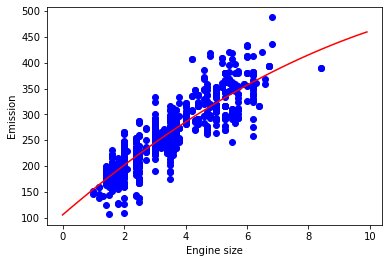

In [13]:
plt.scatter(treino.ENGINESIZE, treino.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

### 2.4. Avaliando resultados

In [14]:
from sklearn.metrics import r2_score

teste_x_poly = poly.transform(teste_x)
teste_y_ = clf.predict(teste_x_poly)

print("Erro médio absoluto: %.2f" % np.mean(np.absolute(teste_y_ - teste_y)))
print("Erro residual da soma dos quadrados (MSE): %.2f" % np.mean((teste_y_ - teste_y) ** 2))
print("R2-score: %.2f" % r2_score(teste_y,teste_y_ ) )

Erro médio absoluto: 25.93
Erro residual da soma dos quadrados (MSE): 1124.64
R2-score: 0.73


## 3. Regressão Múltipla

Na prática, existem vários fatores que impactam as emissões de dióxido de carbono. Quando há mais de uma variável independente, o processo de regressão é chamado de regressão múltipla. 

Como exemplo, utilizaremos os dados 'ENGINESIZE','CYLINDERS' e 'FUELCONSUMPTION_COMB' para traçar uma relação com a emissão de dióxido de carbonos.

Por simplicidade, encontraremos coeficientes lineares para o modelo. O modelo de regressão linear é responsável por achar os melhores coeficientes para cada um dos dados, criando uma equação da forma: 
$$y = a + \theta_1  x + \theta_2 w + \theta_3 z$$

Por analogia, uma regressão com uma variável independente pode ser visualizada em um gráfico 2D, uma regressão com duas variáveis independentes pode ser visualizada em um gráfico 3D, uma regressão com 3 variáveis em um espaço 4D, e assim por diante...

### 3.1. Criando modelo

In [15]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(treino[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(treino[['CO2EMISSIONS']])
regr.fit (x, y)

print('Coeficientes: ', regr.coef_)

Coeficientes:  [[11.61694068  7.37811277  9.42251095]]


### 3.2. Avaliando resultados


Por tratar-se de uma estrutura espacial multidimensional, sua visualização não será feita aqui, mas ainda é possível avaliar o modelo sem enxergar graficamente seu resultado.



**Variance regression score:**

Seja $\hat{y}$ o valor estimado, dado pela saída do algoritmo, y o resultado correto correspondente e Var a variância (o quadrado do desvio padrão). Então, o Variance Regression Score é estimado da seguinte forma:

$\texttt{VarianceRegressionScore}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
Onde o melhor valor possível para o score é 1, valores menores são piores.



In [16]:
y_hat = regr.predict(teste[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']].values)
x = np.asanyarray(teste[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']].values)
y = np.asanyarray(teste[['CO2EMISSIONS']].values)

print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 672.26
Variance score: 0.84


## 4. Regressão não linear

A regressão não linear é um método de modelar relações não lineares entre a variável independente $x$ e a variável dependente $y$. Essencialmente, qualquer relação conhecida entre as variáveis pode ser modelada matematicamente para se encaixar em uma expressão. Por exemplo: 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

A regressão não linear é ideal nos casos em que os dados apresentarem um comportamento conhecido, mas que não se encaixa nos vistos anteriormente.

Funções não lineares podem ter elementos como exponenciais, logaritmos, frações e assim por diante, por exemplo:

$$ y = \log(x)$$

Ou uma composição variada de várias expressões ainda mais complicadas, como: 

$$ y = \log(a x^3 + b x^2 + c x + d)$$

Exemplo de aplicação: deseja-se estudar o padrão de crescimento do PIB de uma população. Sabe-se, da geografia, que o crescimento tem aspecto sigmoidal, tendendo para um certo limite.
Com isso em mente, o modelo criado pode procurar se encaixar em uma sigmóide e, consequentemente, ser mais preciso para prever o padrão de crescimento.

Utilizaremos uma base de dados que informa o PIB da China anualmente.Nesse caso, o algoritmo receberá a expressão matemática da sigmóide e terá a função de retornar os coeficientes que melhor ajustam nossos dados a uma sigmóide.

In [17]:
df = pd.read_csv("china_pib.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### 4.1. Analisando a base de dados

Para verificar se nossa suposição inicial estava correta, é necessário fazer uma inspeção visual prévia e verificar se nosso dado se adequa ao formato esperado anteriormente.

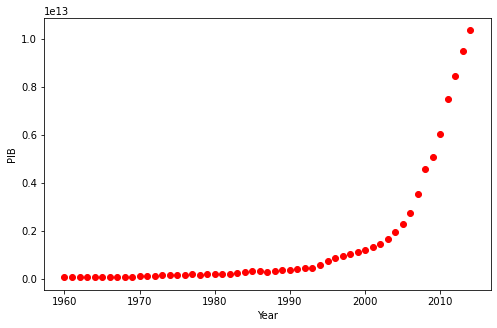

In [18]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('PIB')
plt.xlabel('Year')
plt.show()

# Normalizando a base
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

### 4.2. Definindo a expressão matemática

Na regressão não linear, podemos encontrar os coeficientes ideais para uma expressão, dados seus parâmetros. No caso da sigmóide  logística, a função é expressão como:

$$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

$\beta_1$: Controla a inclinação da curva.

$\beta_2$: Move a curva no eixo-x.

In [19]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

### 4.3. Encontrando os melhores parâmetros

Para encontrar os melhores parâmetros à curva, utilizaremos a biblioteca scipy, feita para matemáticos, cientistas e engenheiros. A biblioteca scipy tem base na biblioteca numpy e possui uma ótima documentação. Recomendamos uma breve exploração da biblioteca: 
https://docs.scipy.org/doc/scipy/tutorial/optimize.html

A função curve_fit realizará o trabalho de encontrar os valores de beta_1 e beta_2 que melhor adequam os dados a uma sigmóide. 

In [20]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


### 4.4. Exibindo resultados

Percebe-se que o PIB da China está em uma fase de crescimento exponencial, mas, se adequando à tendência, possui grande probabilidade de enfrentar um período de maior estabilidade nos próximos anos, com menos crescimento relativo.

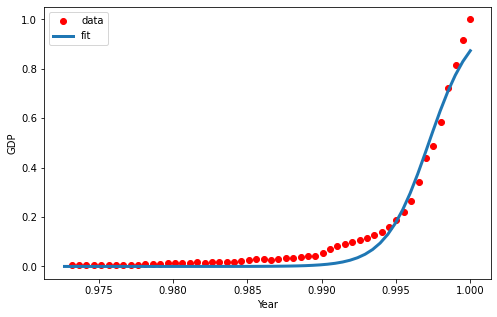

In [21]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Considerações Finais

Ao fim desse módulo sobre regressões, esperamos que tenha sido possível compreender perfeitamente do que se trata uma Regressão e como utilizar as funções disponíveis para realizar uma.

Tentamos expor uma grande variedade de regressões, de forma a ser possível criar qualquer regressão a partir desses modelos-base.

Recomendamos aproveitar ao máximo o código aqui escrito para conferência futura ou revisão, mas incentiva-se fortemente que, a partir do aprendido, seja possível buscar por conta própria por conteúdos na internet e adquirir certa independência para caso seja necessário solucionar problemas menos convencionais.

Isso é tudo, espero que tenham gostado! Até o próximo módulo.